# 10 Big Cats of the Wild - Image Classification

## Dataset :

https://www.kaggle.com/datasets/gpiosenka/cats-in-the-wild-image-classification


In [ ]:
from keras.models import load_model  # TensorFlow é necessário para Keras funcionar
from PIL import Image, ImageOps  # Instale travesseiro em vez de PIL
import numpy as np


In [ ]:
# Desative a notação científica para maior clareza
np.set_printoptions(suppress=True)

In [ ]:
# Carregue o modelo
model = load_model("/content/keras_model.h5", compile=False)

In [ ]:
# Carregue as etiquetas
class_names = open("labels.txt", "r").readlines()

In [ ]:
# Crie a matriz com a forma correta para alimentar o modelo keras
# O 'comprimento' ou número de imagens que você pode colocar no array é
# determinado pela primeira posição na tupla de forma, neste caso 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)


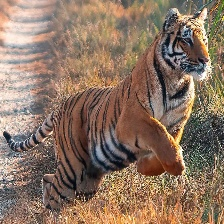

In [ ]:
# Substitua isso pelo caminho para sua imagem
image = Image.open("/content/003t.jpg").convert("RGB")
image

In [ ]:
# redimensionar a imagem para pelo menos 224x224 e depois cortar a partir do centro
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# transformar a imagem em um array numpy
image_array = np.asarray(image)

# Normalizar a imagem
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Carregue a imagem no array
data[0] = normalized_image_array

# Prevê o modelo
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Imprimir previsão e pontuação de confiança
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 0s 35ms/step
Class: Tigre
Confidence Score: 0.9999988
